In [2]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers.merge import concatenate
import pandas as pd
from tqdm import tqdm
import numpy as np
import cv2 
import numpy as np
import keras
import tensorflow as tf
from keras import backend as K 
from keras.utils import np_utils
from keras.layers import Layer
import keras.backend as K
import math 
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.models import Model
from keras.layers import Conv2D, MaxPool2D,Dropout, Dense, Input, concatenate,GlobalAveragePooling2D, AveragePooling2D,Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization , Conv1D,MaxPool1D, AveragePooling1D, Activation
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import io
from zipfile import ZipFile
file_name='/content/drive/MyDrive/Data_224_Edge.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


##Importing The TestData 


In [5]:
test_dir = f'/content/Data_224_Edge/test_dir'
from keras.preprocessing import image

data=image.ImageDataGenerator(featurewise_center=False,
                                   featurewise_std_normalization=False,rescale=1.0/255.0,)
data.mean = np.array([0.485, 0.456, 0.406], dtype=np.float32).reshape((1,1,3)) 
data.std = np.array([0.229, 0.224, 0.225], dtype=np.float32).reshape((1,1,3)) 
test_dataset = data.flow_from_directory(test_dir,
                                      target_size=(224,224),
                                      color_mode='rgb',
                                      class_mode='categorical',
                                      shuffle=False,
                                      batch_size=32)

Found 2533 images belonging to 8 classes.


##Plotting different Curves and graphs

In [6]:
target=['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC']

# set plot figure size


# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred,modelname):
    fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
    average="macro"
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    c_ax.set_title(modelname)
    
    print('ROC AUC score:', roc_auc_score(y_test, y_pred, average=average))

    c_ax.legend()
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')
    plt.show()

def conf_matrix(true_classes, prediction_classes,modelname):
  
  cm = confusion_matrix(true_classes, prediction_classes)
  fig, ax = plt.subplots(figsize=(10,10))
  ax.set_title(modelname)
  sns.set(font_scale=1.6)
  sns.heatmap(cm, annot=True, linewidths=.5, ax=ax,fmt=".0f")
  

##Calculating Sensitivity and Specifity

In [7]:
def sensitivity(y_true,y_pred):
      cm=confusion_matrix(y_true, y_pred)
      FP = cm.sum(axis=0) - np.diag(cm)  
      FN = cm.sum(axis=1) - np.diag(cm)
      TP = np.diag(cm)
      TN = cm.sum() - (FP + FN + TP)
      Sensitivity = TP/(TP+FN)    
      return np.mean(Sensitivity)

def specificity(y_true,y_pred):
        cm=confusion_matrix(y_true, y_pred)
        FP = cm.sum(axis=0) - np.diag(cm)  
        FN = cm.sum(axis=1) - np.diag(cm)
        TP = np.diag(cm)
        TN = cm.sum() - (FP + FN + TP)
        Specificity = TN/(TN+FP)    
        return np.mean(Specificity)

##Load All Trained Models


In [8]:
model1 = keras.models.load_model('/content/drive/MyDrive/Weights/DenseNet201_224_224Final_VersionEDGE.h5')
model2 = keras.models.load_model('/content/drive/MyDrive/Weights/DenseNet201_224x224_With_noPre2')
model3 = keras.models.load_model('/content/drive/MyDrive/Weights/DenseNet201_224x224_new_hair.h5')
model4 = keras.models.load_model('/content/drive/MyDrive/Weights/ResNet50_224_224_Edge.h5')
model5 = keras.models.load_model('/content/drive/MyDrive/Weights/DenseNet201_224_224_Final_Version_Hair_Black.h5')
model6 = keras.models.load_model('/content/drive/MyDrive/Weights/ResNet50_224_224_Final_Version_Hair_Black.h5')
model7 = keras.models.load_model('/content/drive/MyDrive/Weights/ResNet50_224x224_Hair.h5')
model8 = keras.models.load_model('/content/drive/MyDrive/Weights/InceptionV3_224x224_Edge.h5')
model9 = keras.models.load_model('/content/drive/MyDrive/Weights/EfficientNetV2M_224x224_Edge.h5')
model10 = keras.models.load_model('/content/drive/MyDrive/Weights/EfficientNetV2S_224_224EDGE.h5')
model11 = keras.models.load_model('/content/drive/MyDrive/Weights/NASNetMobile_224_224EDGE.h5')
model12 = keras.models.load_model('/content/drive/MyDrive/Weights/EfficientNetB0_224_224Final_VersionEDGE.h5')
model13 = keras.models.load_model('/content/drive/MyDrive/Weights/ResNet152_224_224Final_VersionEDGE.h5')
model14 = keras.models.load_model('/content/drive/MyDrive/Weights/VGG19_224_224Final_VersionEDGE.h5')
model15 = keras.models.load_model('/content/drive/MyDrive/Weights/Xception_224_224_Final_Version_Edge.h5')
model16 = keras.models.load_model('/content/drive/MyDrive/Weights/MobileNet_224_224_Final_Version_Edge.h5')


##Models Predictions and Results

*   Classification Report
*   Sensitivity and Specifity







In [9]:
Model_Name = ['DenseNet201_224_224Final_VersionEDGE',
         'DenseNet201_224x224_With_noPre2',
       'DenseNet201_224x224_new_hair',
        'ResNet50_224_224_Edge',
        "DenseNet201_224_224_Final_Version_Hair_Black",
        "ResNet50_224_224_Final_Version_Hair_Black",
        "ResNet50_224x224_Hair",
        "InceptionV3_224x224_Edge",
        'EfficientNetV2M_224x224_Edge',
        'EfficientNetV2S_224_224EDGE',
        'NASNetMobile_224_224EDGE',
        'EfficientNetB0_224_224Final_VersionEDGE',
        "ResNet152_224_224Final_VersionEDGE",
        "VGG19_224_224Final_VersionEDGE",
        "Xception_224_224_Final_Version_Edge",
        "MobileNet_224_224_Final_Version_Edge"
]

models=[model1 ,model2, model3,model4 ,model5, model6, model7, model8, model9, model10, model11 ,model12, model13 ,model14, model15 ,model16 ]

pred=[]
true_classes=[]
cms=[]

for i  in range(16):

  prediction_classes_1 = np.array([])
  true_classes_1=  np.array([])
  a=np.argmax(models[i].predict(test_dataset), axis = -1)
  prediction_classes_1 = np.concatenate([prediction_classes_1,a])
  true_classes_1 = np.concatenate([true_classes_1, test_dataset.classes])
  pred.append(prediction_classes_1)
  true_classes.append(true_classes_1)
  scoring = {'ModelName':Model_Name[i],
      'sensitivity' : sensitivity(true_classes[i],pred[i]),
               'specificity' : specificity(true_classes[i],pred[i])}
  print(Model_Name[i],classification_report( true_classes[i],pred[i]),'######################################################',scoring,"######################################################",sep='\n')


DenseNet201_224_224Final_VersionEDGE
              precision    recall  f1-score   support

         0.0       0.77      0.80      0.79        87
         1.0       0.90      0.90      0.90       332
         2.0       0.78      0.79      0.78       262
         3.0       0.87      0.83      0.85        24
         4.0       0.86      0.77      0.81       452
         5.0       0.91      0.95      0.93      1287
         6.0       0.79      0.65      0.71        63
         7.0       0.96      0.85      0.90        26

    accuracy                           0.88      2533
   macro avg       0.85      0.82      0.83      2533
weighted avg       0.88      0.88      0.88      2533

######################################################
{'ModelName': 'DenseNet201_224_224Final_VersionEDGE', 'sensitivity': 0.8179290484184547, 'specificity': 0.9773894755010359}
######################################################
DenseNet201_224x224_With_noPre2
              precision    recall  f1-score   

##Generating Confusion_Matrix for each Model 



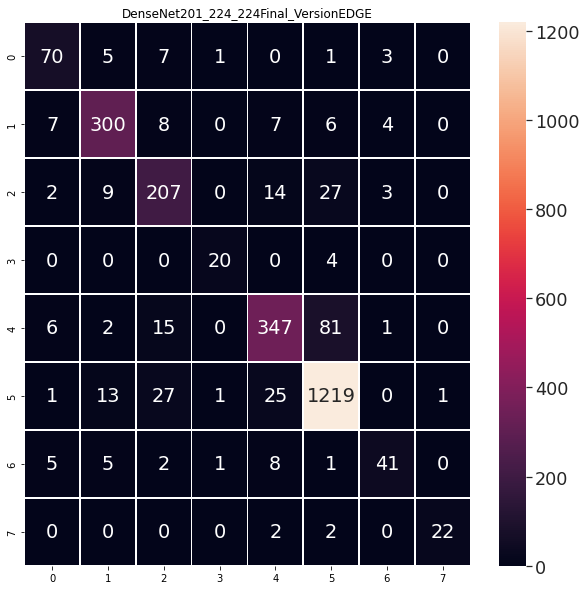

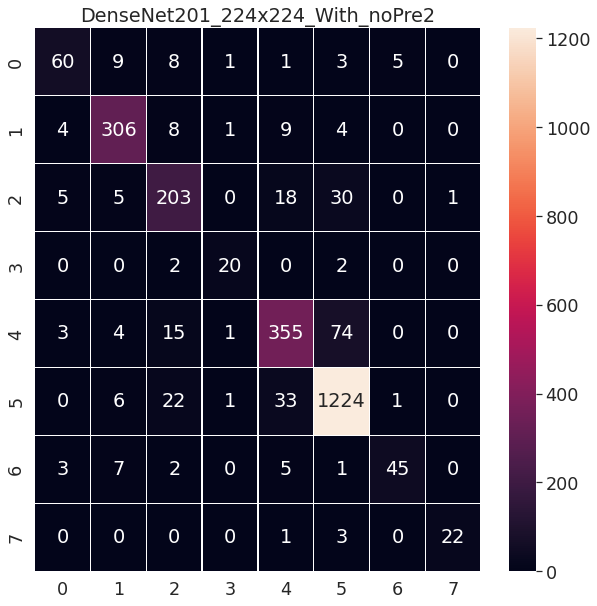

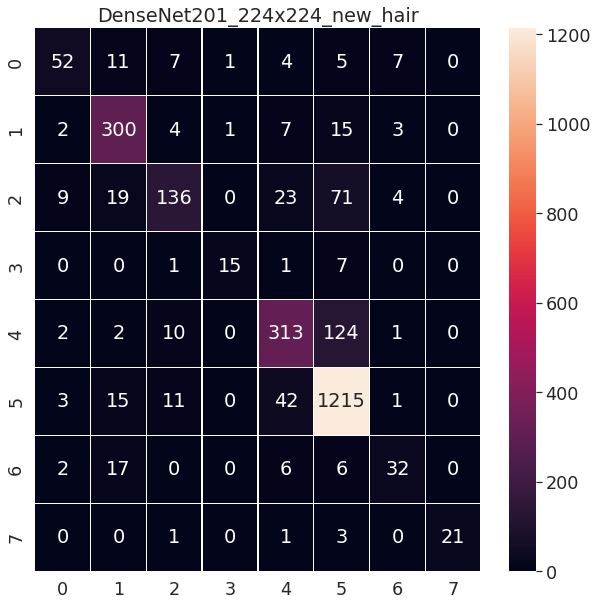

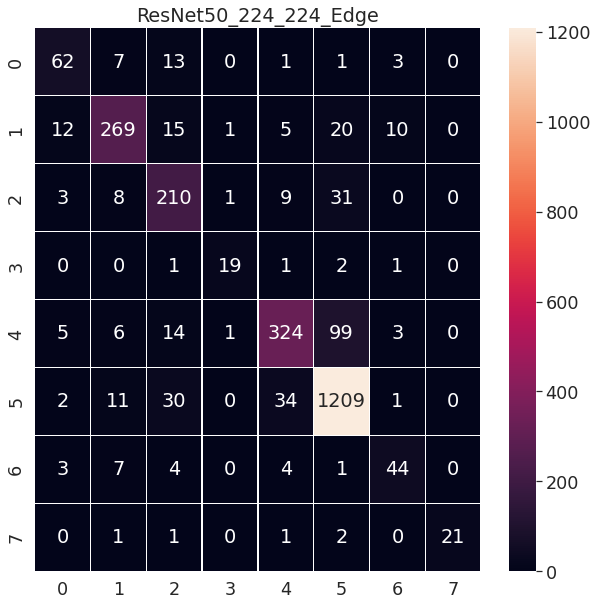

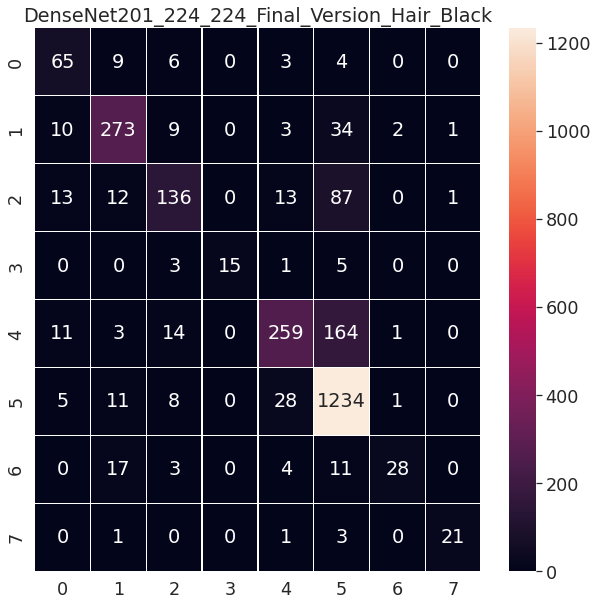

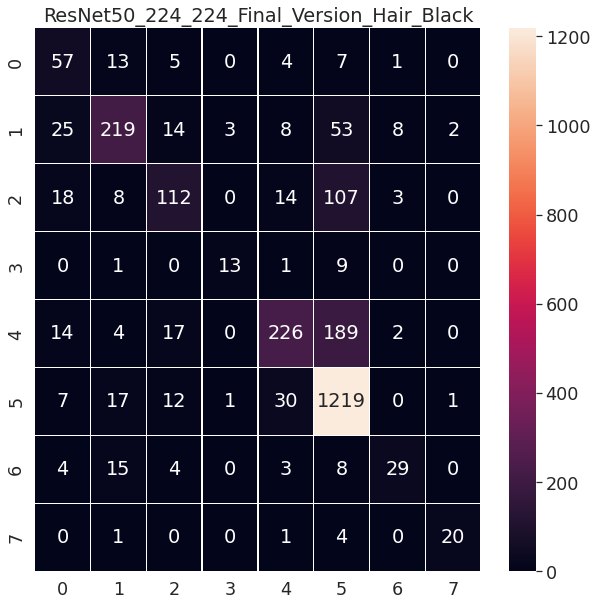

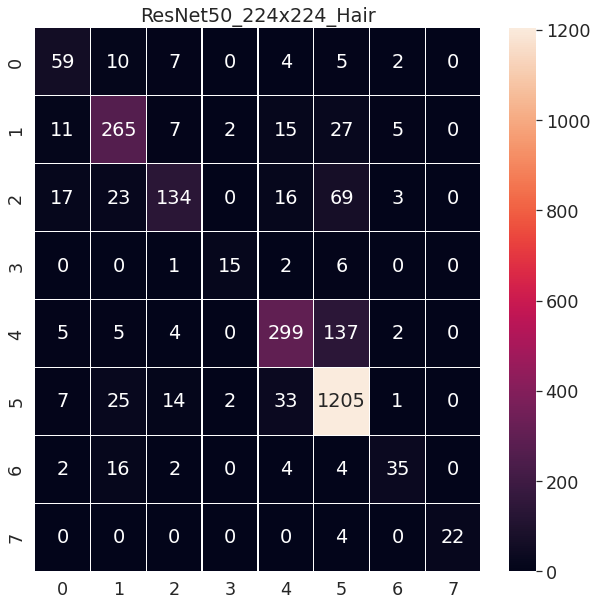

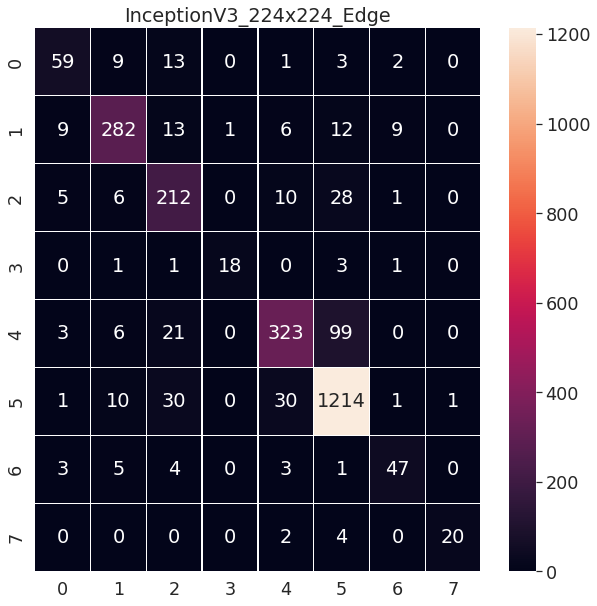

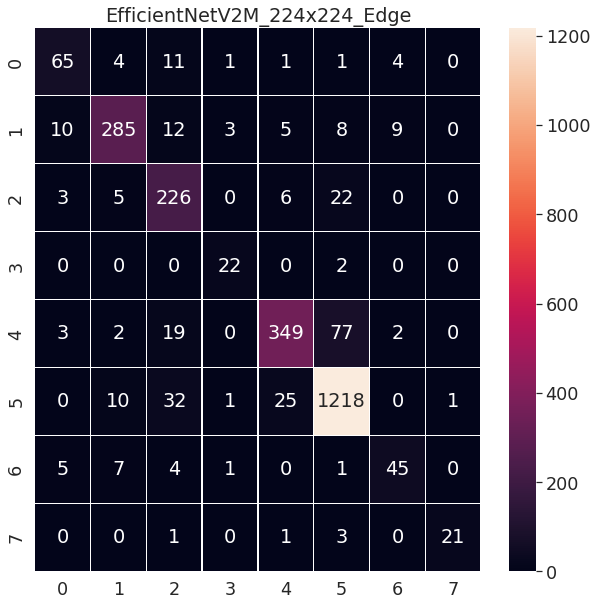

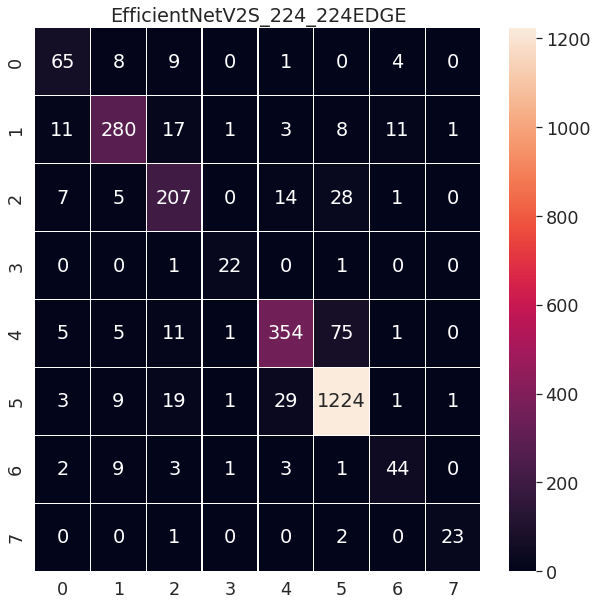

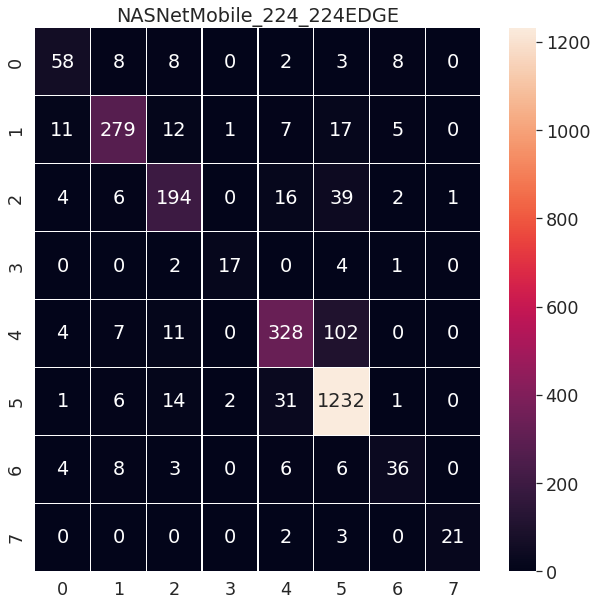

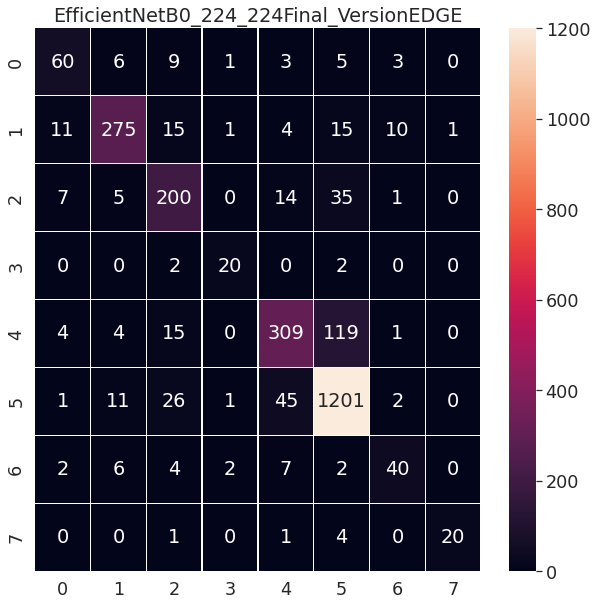

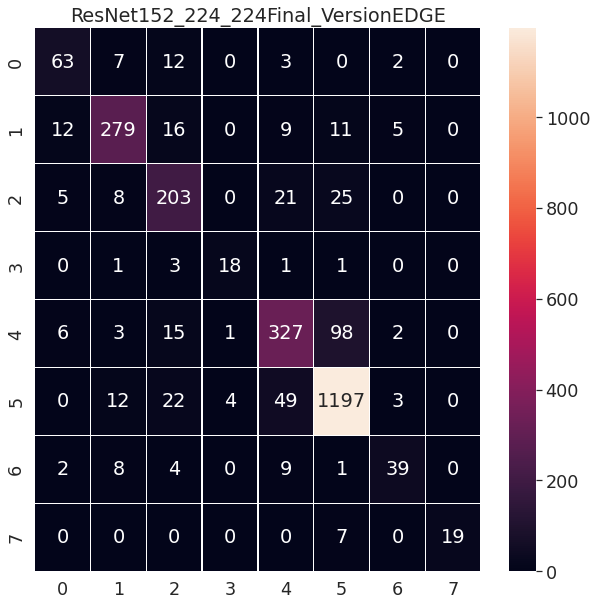

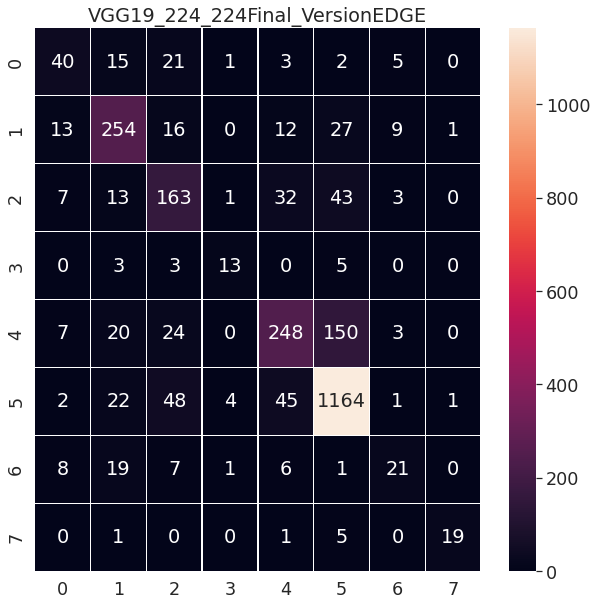

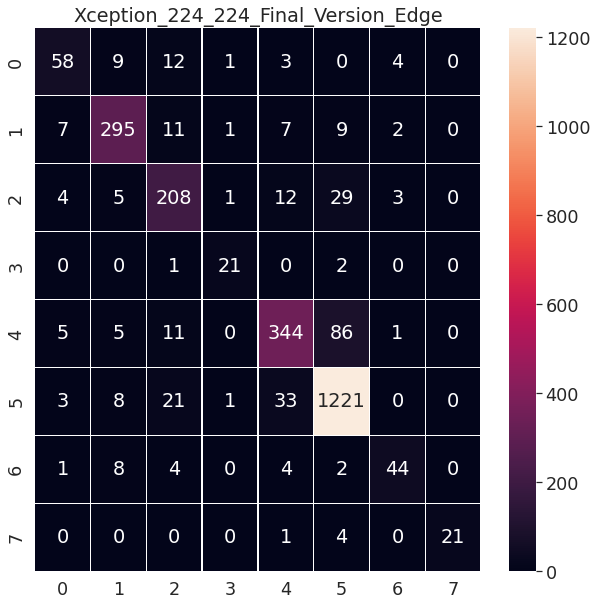

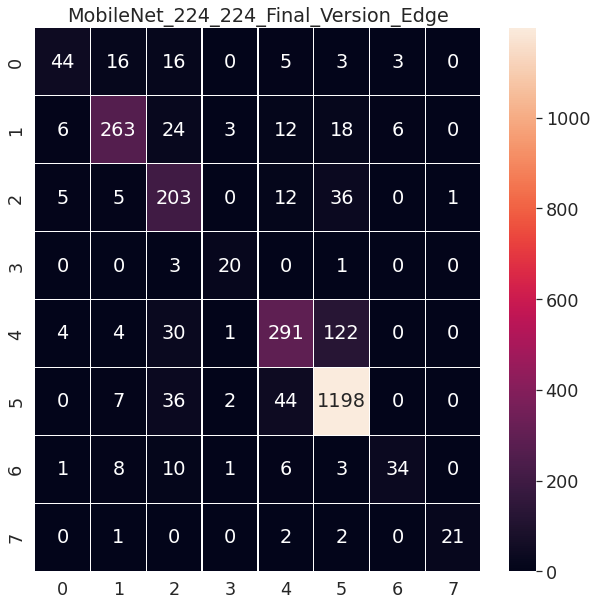

In [10]:
for i in range (16):
    conf_matrix(true_classes[0],pred[i],Model_Name[i])
    

##Generating ROC Curve for each Model 



ROC AUC score: 0.8976592619597454


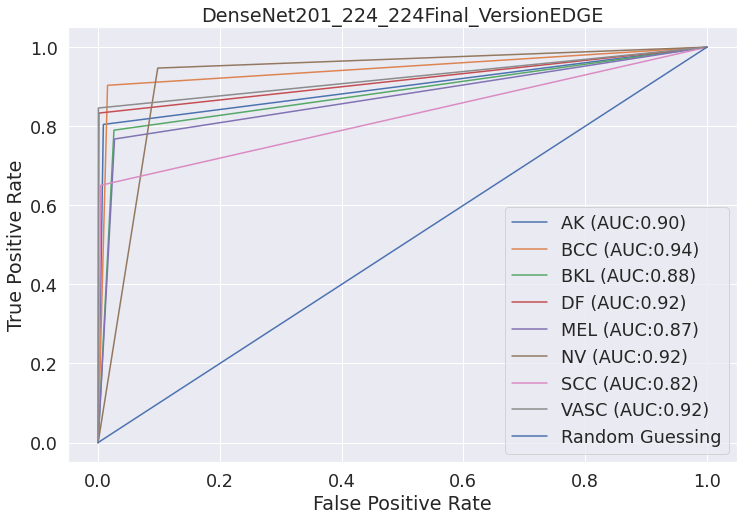

ROC AUC score: 0.8962835172751731


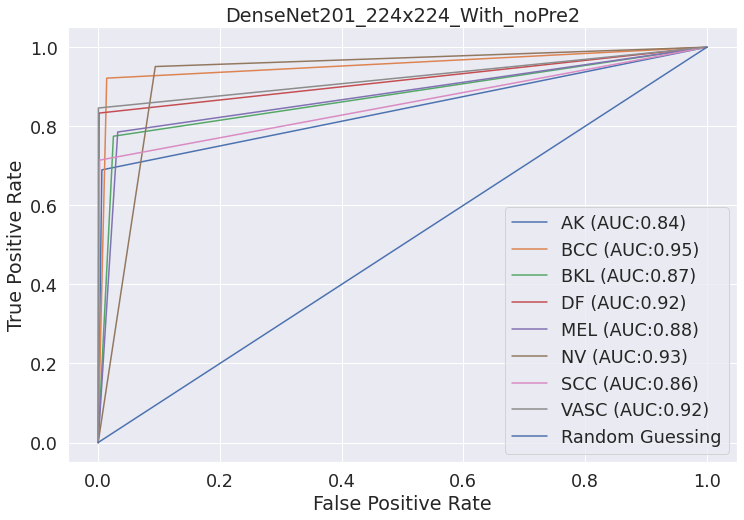

ROC AUC score: 0.8320700536455523


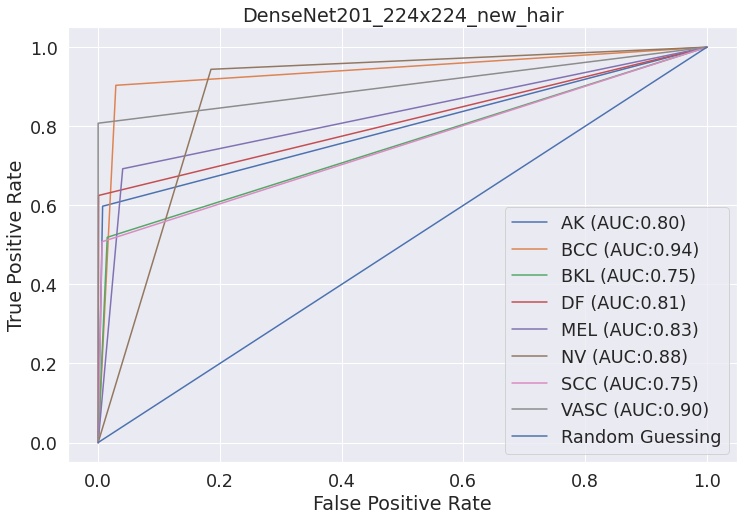

ROC AUC score: 0.878471082113779


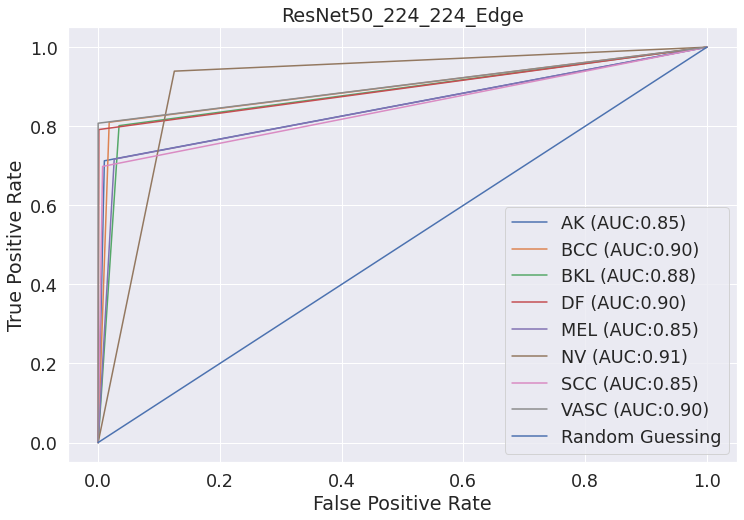

ROC AUC score: 0.8227142896963914


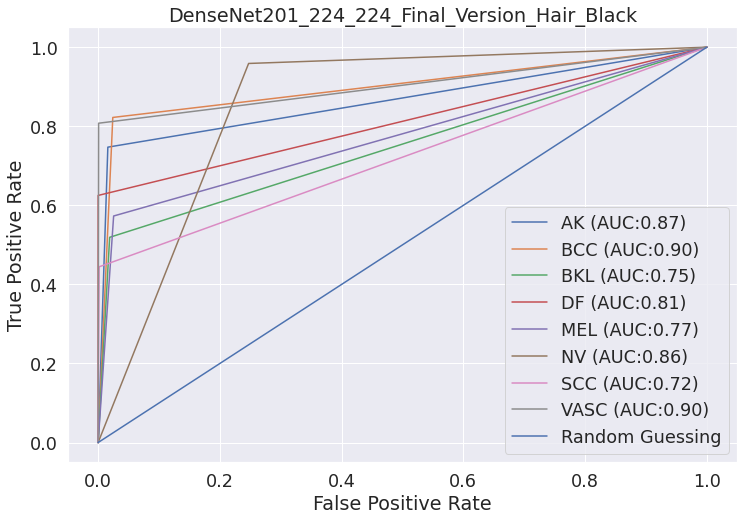

ROC AUC score: 0.7839266789135436


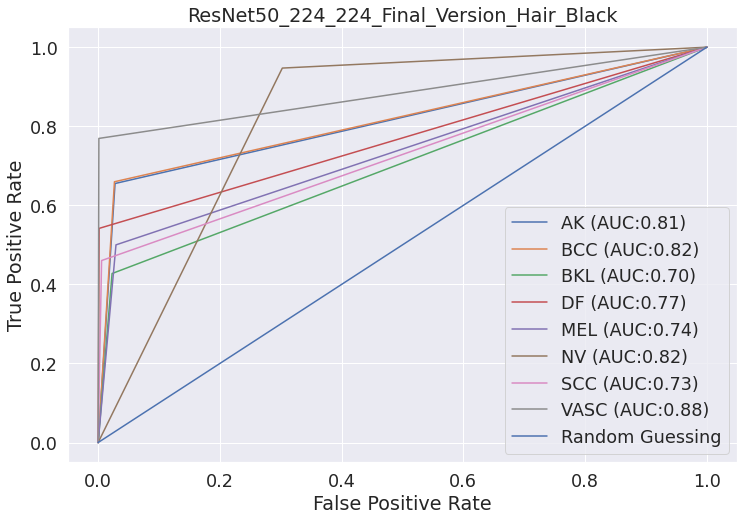

ROC AUC score: 0.8311977511462804


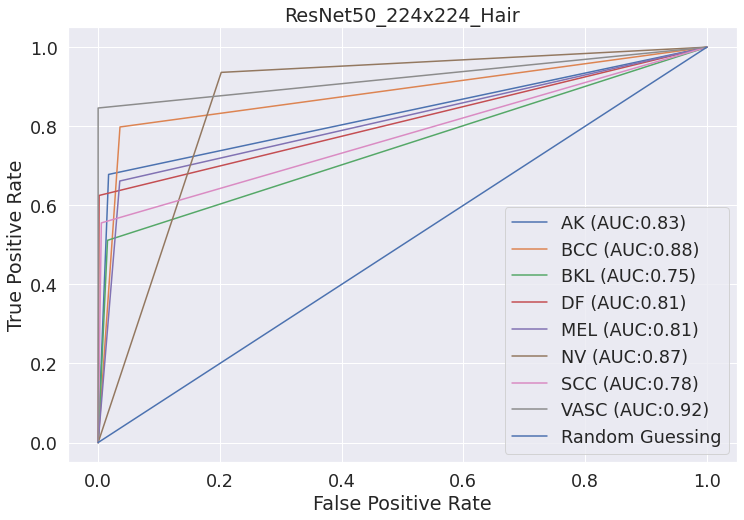

ROC AUC score: 0.8779074957485595


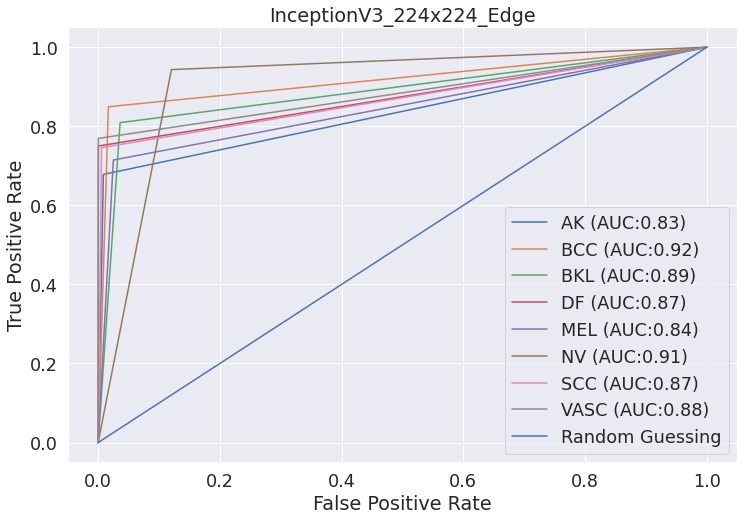

ROC AUC score: 0.9031625856031392


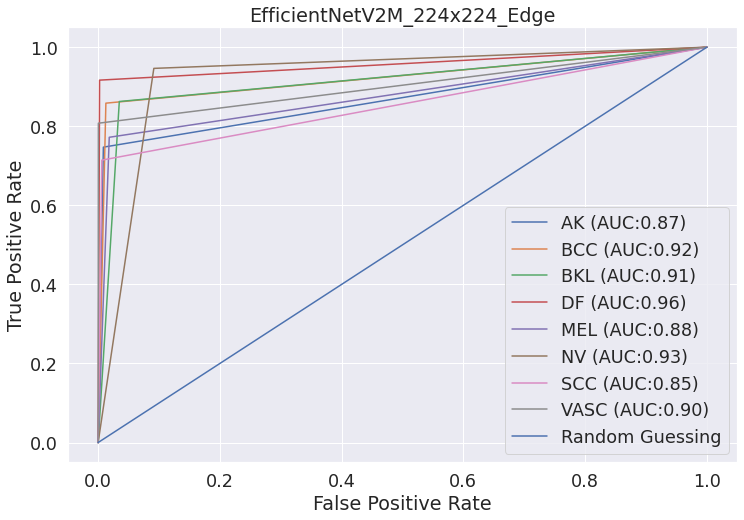

ROC AUC score: 0.9021150125037158


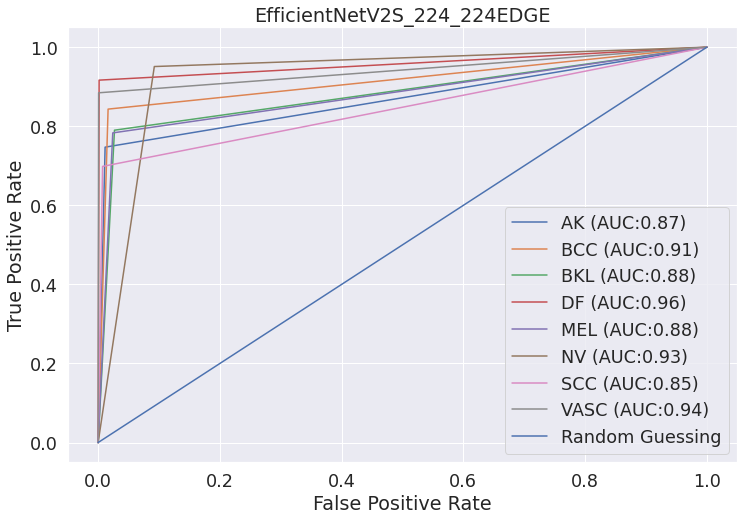

ROC AUC score: 0.8619537497629484


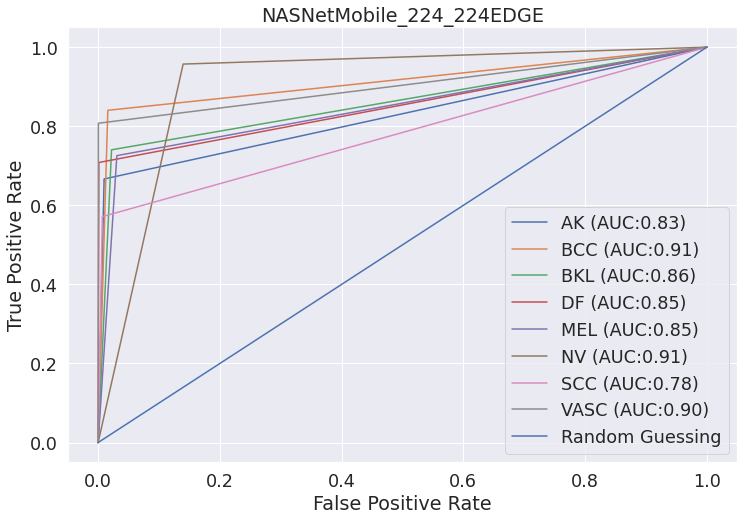

ROC AUC score: 0.8680158088013366


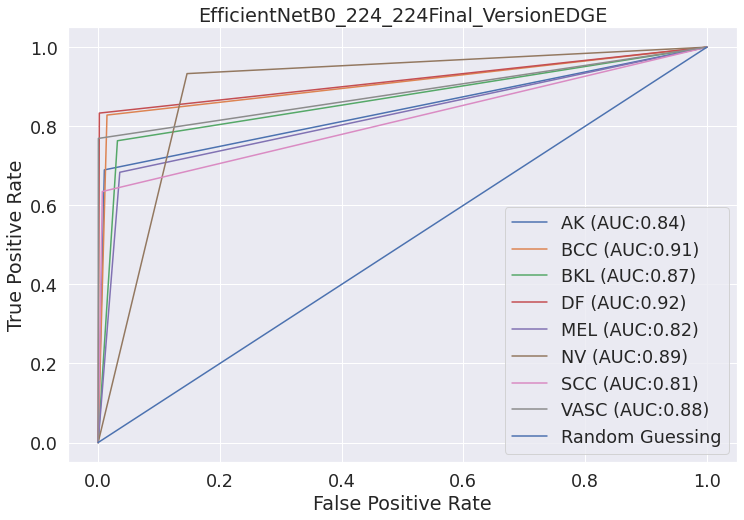

ROC AUC score: 0.8666984166810613


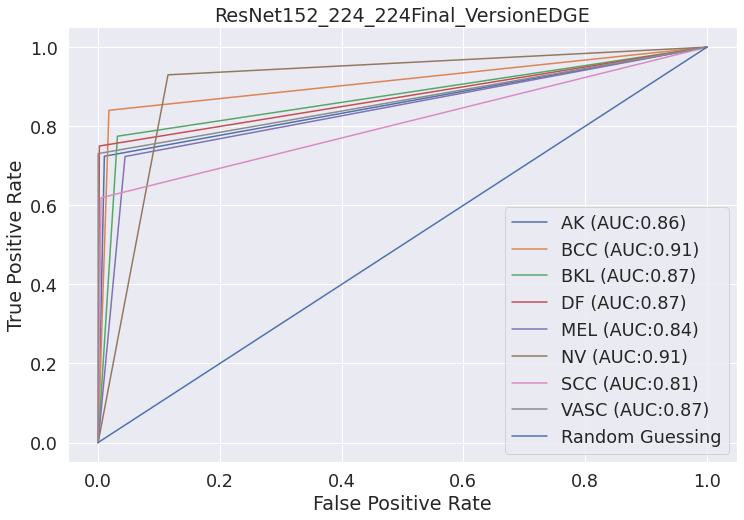

ROC AUC score: 0.7843373097430928


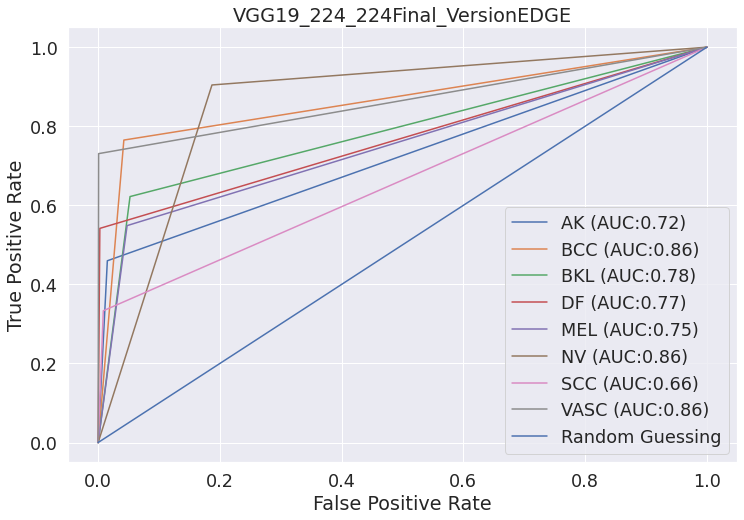

ROC AUC score: 0.8905678885912008


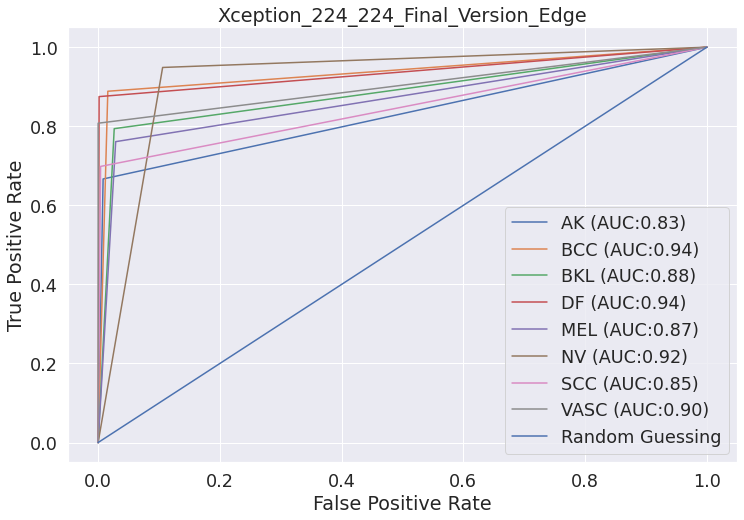

ROC AUC score: 0.847267818234757


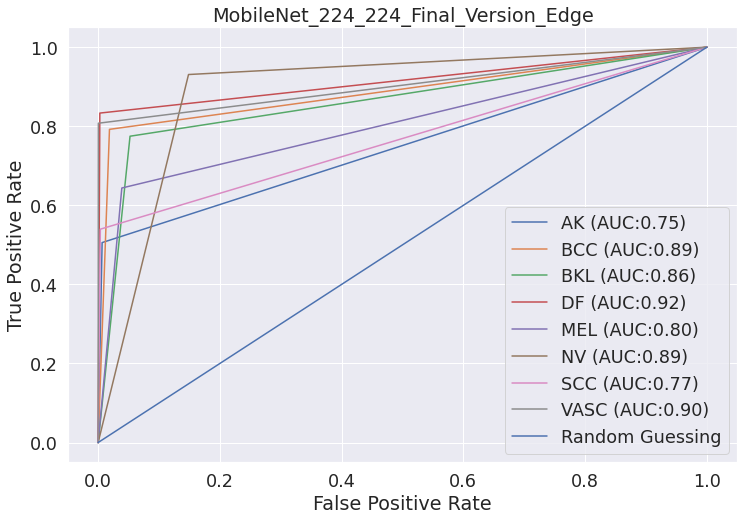

In [11]:
for i in range (16):
    multiclass_roc_auc_score(true_classes[i],pred[i],Model_Name[i])

In [12]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
keras.models.Model.predict_proba=keras.models.Model.predict
from mlxtend.classifier import EnsembleVoteClassifier
from scipy.optimize import minimize

In [15]:
models=[model1,model2,model4,model8,model9,model10,model11,model13,model15]
def function_to_minimize(weights, models):

    w1,w2, w3,w4,w5,w6,w7,w8= weights  # these are the new weights!

    newclf = EnsembleVoteClassifier(
        voting="soft",
        refit=False,
        clfs=models,
        weights=( w1,w2, w3,w4,w5,w6,w7,w8,1.),  # use the new weights
    )

    newclf.fit(test_dataset, true_classes[0])
    score = newclf.score(test_dataset, true_classes[0])

    # change accuracy to error so that smaller is better
    score_to_minimize = 1 - score

    return score_to_minimize

In [ ]:
%%capture --no-display

init_weights = [1.,1.,1.,1.,1.,1.,1.,1.]

results = minimize(
    function_to_minimize,
    init_weights,
    args=((model1,model2,model4,model8,model9,model10,model11,model13,model15),),
    bounds=((0, 5), (0, 5)),
    method="nelder-mead",
)

In [ ]:
solution = results["x"]
print(solution)

In [16]:
eclf = EnsembleVoteClassifier(
    clfs=(model1,model2,model4,model8,model9,model10,model11,model13,model15),
    voting="soft",
    weights=(1. ,1. ,1. ,1. ,1., 1., 1., 1.,1.),
    refit=False
)

eclf.fit(test_dataset,true_classes[0])
eclf.score(test_dataset,true_classes[0])

0.9013028030003948

In [17]:
eclf.weights

(1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0)

In [18]:
predictions = (eclf.predict(test_dataset))

In [19]:
print(classification_report(true_classes[0], predictions))

              precision    recall  f1-score   support

         0.0       0.81      0.78      0.80        87
         1.0       0.92      0.92      0.92       332
         2.0       0.83      0.85      0.84       262
         3.0       0.95      0.88      0.91        24
         4.0       0.90      0.79      0.84       452
         5.0       0.92      0.97      0.94      1287
         6.0       0.89      0.75      0.81        63
         7.0       0.95      0.81      0.88        26

    accuracy                           0.90      2533
   macro avg       0.90      0.84      0.87      2533
weighted avg       0.90      0.90      0.90      2533



ROC AUC score: 0.9113359340536819


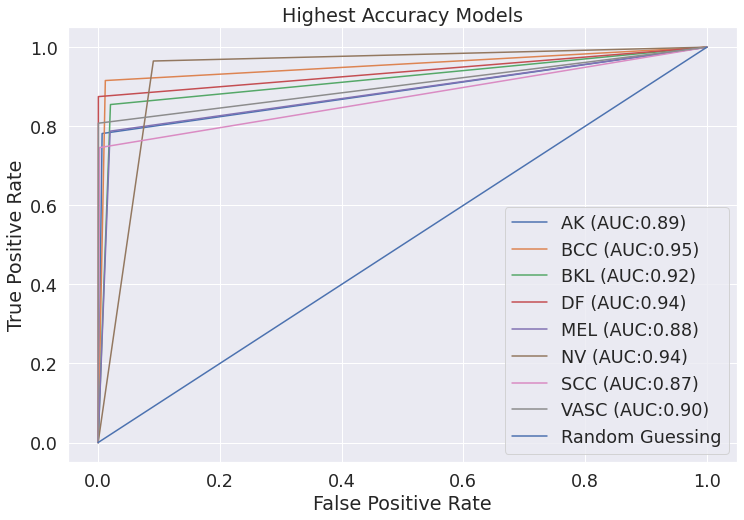

In [20]:
multiclass_roc_auc_score(true_classes[0],predictions,"Highest Accuracy Models")

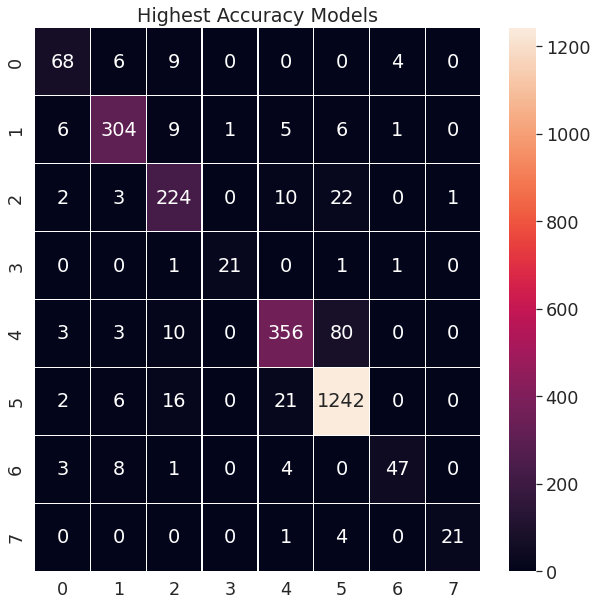

In [21]:
conf_matrix(true_classes[0],predictions,"Highest Accuracy Models")

In [22]:
from sklearn.metrics import balanced_accuracy_score
print((balanced_accuracy_score(true_classes[0], predictions))*100)

84.17004145367278


In [23]:
scoring = {'ModelName':'Highest Models ',
      'sensitivity' : sensitivity(true_classes[0],predictions),
               'specificity' : specificity(true_classes[0],predictions)}
print(scoring)

{'ModelName': 'Highest Models ', 'sensitivity': 0.8417004145367278, 'specificity': 0.9809714535706358}


In [24]:
models1=[model3,model5,model4,model6,model7,model12,model14,model16]
def function_to_minimize(weights, models):

    w1,w2, w3,w4,w5,w6,w7= weights  # these are the new weights!

    newclf = EnsembleVoteClassifier(
        voting="soft",
        refit=False,
        clfs=models,
        weights=( w1,w2, w3,w4,w5,w6,w7,1.),  # use the new weights
    )

    newclf.fit(test_dataset, true_classes[0])
    score = newclf.score(test_dataset, true_classes[0])

    # change accuracy to error so that smaller is better
    score_to_minimize = 1 - score

    return score_to_minimize

In [ ]:
%%capture --no-display

init_weights = [1.,1.,1.,1.,1.,1.,1.]

results = minimize(
    function_to_minimize,
    init_weights,
    args=((model3,model5,model4,model6,model7,model12,model14,model16),),
    bounds=((0, 5), (0, 5)),
    method="nelder-mead",
)

In [ ]:
solution = results["x"]
print(solution)

[0.80213799 1.01023742 1.1811037  0.34781593 1.19786193 1.52514413
 0.98928225]


In [26]:
eclf2 = EnsembleVoteClassifier(
    clfs=(model3,model5,model4,model6,model7,model12,model14,model16),
    voting="soft",
    weights=(0.8021379940989988,1.0102374152767584,1.1811037018879853,0.34781593183076764,1.1978619277561808,1.525144134333389,0.989282247359005,1.0),
    refit=False
)

eclf2.fit(test_dataset,true_classes[0])
eclf2.score(test_dataset,true_classes[0])

0.87248322147651

In [ ]:
eclf2.weights

(0.8021379940989988,
 1.0102374152767584,
 1.1811037018879853,
 0.34781593183076764,
 1.1978619277561808,
 1.525144134333389,
 0.989282247359005,
 1.0)

In [27]:
predictions1 = (eclf2.predict(test_dataset))

In [28]:
print(classification_report(true_classes[0], predictions1))

              precision    recall  f1-score   support

         0.0       0.81      0.76      0.79        87
         1.0       0.90      0.89      0.90       332
         2.0       0.83      0.76      0.80       262
         3.0       1.00      0.83      0.91        24
         4.0       0.89      0.69      0.78       452
         5.0       0.87      0.97      0.92      1287
         6.0       0.93      0.62      0.74        63
         7.0       1.00      0.85      0.92        26

    accuracy                           0.87      2533
   macro avg       0.90      0.80      0.84      2533
weighted avg       0.87      0.87      0.87      2533



ROC AUC score: 0.8855648599199664


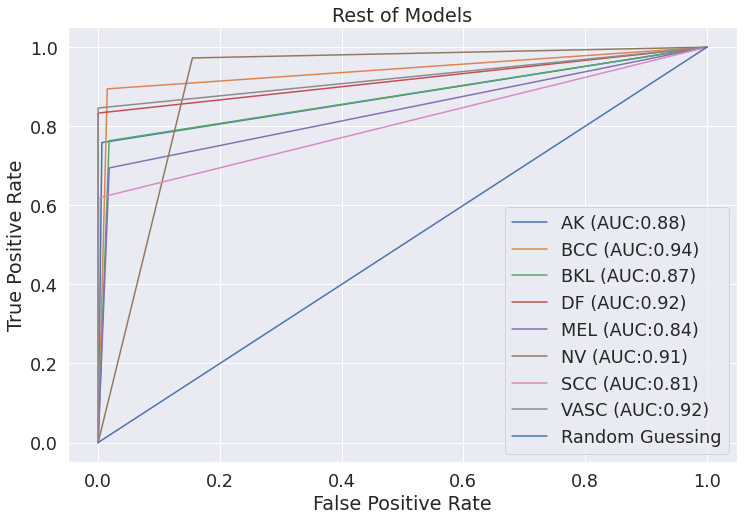

In [29]:
multiclass_roc_auc_score(true_classes[0],predictions1,"Rest of Models")

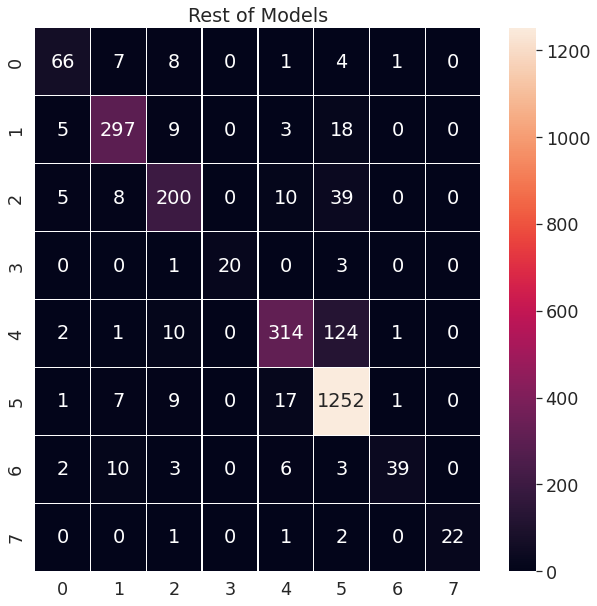

In [30]:
conf_matrix(true_classes[0],predictions1,"Rest of Models")

In [31]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(true_classes[0], predictions1)

0.7978234772950794

In [32]:
scoring = {'ModelName':'RestModels ',
      'sensitivity' : sensitivity(true_classes[0],predictions1),
               'specificity' : specificity(true_classes[0],predictions1)}
print(scoring)

{'ModelName': 'RestModels ', 'sensitivity': 0.7978234772950794, 'specificity': 0.9733062425448533}


In [33]:
#models=[model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,model11,model12,model13,model14,model15,model16]
models=[eclf,eclf2]
from scipy.optimize import minimize


def function_to_minimize(weights, models):

    w1,w2= weights  # these are the new weights!

    newclf = EnsembleVoteClassifier(
        voting="soft",
        refit=False,
        clfs=models,
        weights=( w1,w2),  # use the new weights
    )

    newclf.fit(test_dataset, true_classes_1)
    score = newclf.score(test_dataset, true_classes_1)

    # change accuracy to error so that smaller is better
    score_to_minimize = 1 - score

    return score_to_minimize

In [ ]:
%%capture --no-display

init_weights = [1.,1.]

results = minimize(
    function_to_minimize,
    init_weights,
    args=((eclf,eclf2),),
    bounds=((0, 5), (0, 5)),
    method="nelder-mead",
)

In [ ]:
solution = results["x"]
print(solution)

[1.15  0.925]


In [34]:
eclfx = EnsembleVoteClassifier(
    clfs=(eclf,eclf2),
    voting="soft",
    weights=(1.15,0.925),
    refit=False
)

eclfx.fit(test_dataset,true_classes[0])
eclfx.score(test_dataset,true_classes[0])

0.8957757599684169

In [35]:
eclfx.weights

(1.15, 0.925)

In [36]:
predictionsx = (eclfx.predict(test_dataset))

In [37]:
print(classification_report(true_classes[0], predictionsx))

              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80        87
         1.0       0.91      0.92      0.91       332
         2.0       0.82      0.82      0.82       262
         3.0       1.00      0.88      0.93        24
         4.0       0.90      0.77      0.83       452
         5.0       0.91      0.97      0.94      1287
         6.0       0.92      0.70      0.79        63
         7.0       1.00      0.85      0.92        26

    accuracy                           0.90      2533
   macro avg       0.91      0.83      0.87      2533
weighted avg       0.90      0.90      0.89      2533



ROC AUC score: 0.9069931416314075


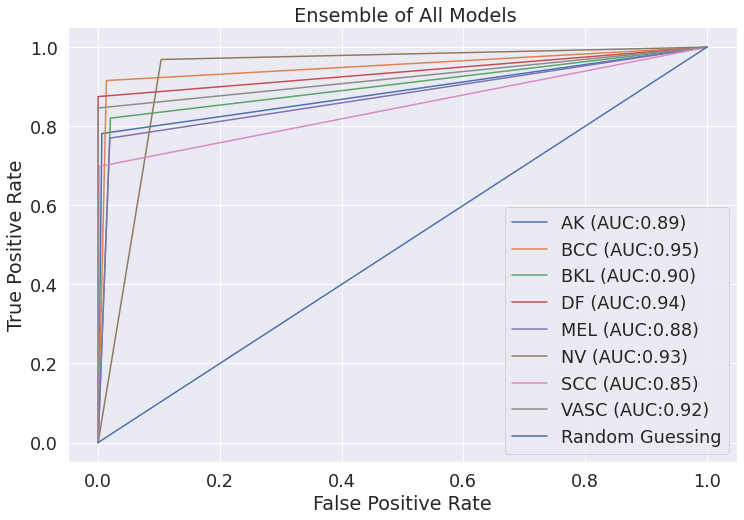

In [38]:
multiclass_roc_auc_score(true_classes[0],predictionsx," Ensemble of All Models")

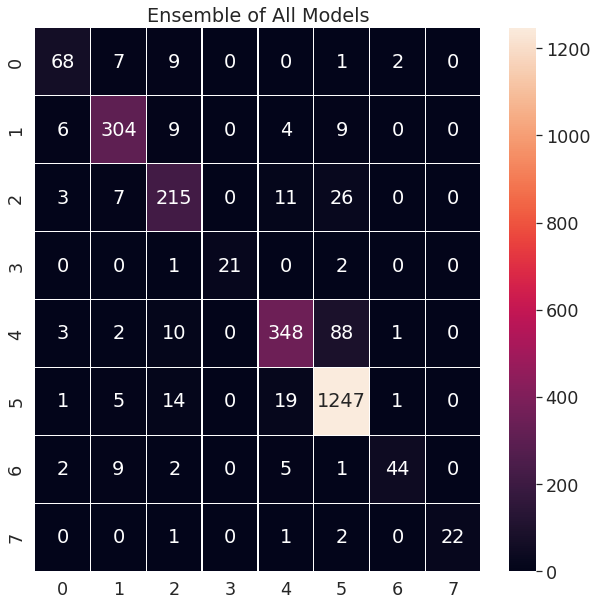

In [39]:
conf_matrix(true_classes[0],predictionsx,"Ensemble of All Models")

In [40]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(true_classes[0], predictionsx)

0.8345350688673626

In [41]:
scoring = {'ModelName':'RestModels ',
      'sensitivity' : sensitivity(true_classes[0],predictionsx),
               'specificity' : specificity(true_classes[0],predictionsx)}
print(scoring)

{'ModelName': 'RestModels ', 'sensitivity': 0.8345350688673626, 'specificity': 0.9794512143954525}
